In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from fleck import generate_spots, Stars

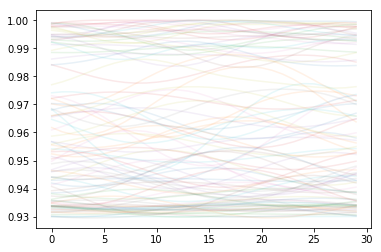

In [3]:
n_incs = 100
n_spots = 3

inc_stellar = (180*np.random.rand(n_incs) - 90) * u.deg
spot_radii = 0.25 * np.ones((n_spots, n_incs))
spot_lats = (20*np.random.rand(n_spots, n_incs) + 70) * u.deg
spot_lons = 360*np.random.rand(n_spots, n_incs) * u.deg

spot_contrast = 0.7
n_phases = 30
u_ld = [0.5079, 0.2239]

stars = Stars(spot_contrast, n_phases, u_ld)
lcs = stars.light_curves(spot_lons, spot_lats, spot_radii, inc_stellar)

plt.plot(lcs, alpha=0.1);

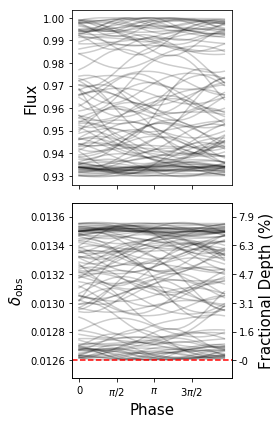

In [4]:
b = 0 
rprs = 0.1

x = 1 - np.sqrt(1 - b**2)
lam_max = rprs**2 * ( 1 - u_ld[0] * x - u_ld[1] * x**2) / (1 - u_ld[0]/3 - u_ld[1]/6)

depth_observed = lam_max / lcs[:, :100]
fs = 15

ticks = np.arange(0, 2*np.pi, 0.5*np.pi)

fig, ax = plt.subplots(2, 1, figsize=(4, 6), sharex=True)

ax[0].plot(stars.phases, lcs[:, :100], color='k', alpha=0.2)
ax[0].set_ylabel('Flux', fontsize=fs)

ax2 = ax[1].twinx()

ax[1].set_xticks(ticks)
ax[1].set_xticklabels([0, '$\pi/2$', '$\pi$', '$3\pi/2$'])

# ax2.plot(stars.phases, np.zeros((len(stars.phases))))

ax[1].plot(stars.phases, depth_observed, alpha=0.2, color='k')

ax[1].set_ylim([0.99*depth_observed[:, :100].min(), 1.01*depth_observed[:, :100].max()])
ax2.set_ylim(ax[1].get_ylim())

ax2.set_yticklabels(["{0:.2g}".format(np.round(100*(i/lam_max - 1), 1)) for i in ax2.get_yticks()])
ax2.set_ylabel('Fractional Depth (%)', fontsize=fs)

ax[1].axhline(lam_max, ls='--', color='r')
ax[1].set_xlabel('Phase', fontsize=fs)
ax[1].set_ylabel('$\delta_{\\rm obs}$', fontsize=fs)

fig.tight_layout()
fig.savefig('plots/depths.pdf', bbox_inches='tight')
plt.show()

In [7]:
np.sqrt(1.08*rprs**2) / rprs

1.0392304845413265